In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('Datasets/train.csv')

In [5]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
dataset.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
dataset=dataset.dropna()

In [10]:
new_df=dataset.copy()

In [11]:
new_df.reset_index(inplace=True)

In [16]:
import re
import nltk
#nltk allows to download the words that we dont want to include(the/or/and)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#if we dont import stemmer then we might have redundancy
corpus=[]
for i in range(0,len(new_df)):
    review = re.sub('[^a-zA-Z]', ' ', new_df['title'][i])
    #transforming capilat letters to smaller case
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    #iterating through all the words in review
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    


In [17]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [21]:
#Creating the Bag Of Word Model
#cells will have values 0/1 based on whether the reviews dont have the words or have them
#this is called tokenization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()
y=new_df.iloc[:,-1].values

In [22]:
x.shape

(18285, 5000)

In [25]:
#splitting into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [27]:
text_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [28]:
text_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#training the train dataset with Multinomial Bayes model
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [50]:
from sklearn import metrics
import itertools

In [51]:
predictions=classifier.predict(X_test)
acs=metrics.accuracy_score(y_test,predictions)
print(acs)
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

0.9010770505385253
[[3044  345]
 [ 252 2394]]


In [52]:
import seaborn as sns

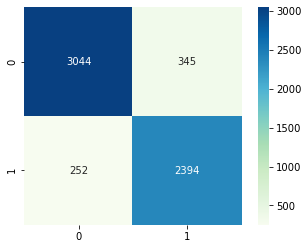

In [53]:
axes=sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
#x-axis:0 represents the fake news where as 1 prepresents real news


In [54]:
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [55]:
new_classifier=MultinomialNB(alpha=0.1)

In [56]:
#value of alpha can be variable

In [59]:
#apha will lie between 0 and 1 and will increment by 0.1 in each step
score=0
for alpha in np.arange(0,1,0.1):
    classifier2=MultinomialNB(alpha=alpha)
    classifier2.fit(X_train,y_train)
    new_predictions=classifier2.predict(X_test)
    new_score=metrics.accuracy_score(new_predictions,y_test)
    if new_score>score:
        new_classifier=classifier2
    print("Alpha: {}, Score : {}".format(alpha,new_score))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9012427506213753
Alpha: 0.2, Score : 0.9015741507870754
Alpha: 0.30000000000000004, Score : 0.9015741507870754
Alpha: 0.4, Score : 0.9007456503728252
Alpha: 0.5, Score : 0.9005799502899752
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9019055509527755
Alpha: 0.8, Score : 0.9007456503728252
Alpha: 0.9, Score : 0.9009113504556753


In [61]:
new_classifier.coef_
#most negative value is the most fake word

array([[ -9.10036605,  -8.6227385 ,  -9.10036605, ..., -10.79496178,
         -8.91464891,  -9.32862471]])

In [66]:
feature_name=cv.get_feature_names()

In [71]:
### Most real
sorted(zip(new_classifier.coef_[0], feature_name), reverse=True)

[(-4.000126376264419, 'trump'),
 (-4.287849914102974, 'hillari'),
 (-4.396366840720952, 'clinton'),
 (-4.899946945868169, 'elect'),
 (-5.176575820557189, 'new'),
 (-5.2347075860082, 'comment'),
 (-5.273945400633064, 'video'),
 (-5.386793987777445, 'war'),
 (-5.396799073738407, 'us'),
 (-5.4119969346478385, 'hillari clinton'),
 (-5.417114653084819, 'fbi'),
 (-5.4806617042015136, 'vote'),
 (-5.566232695514838, 'email'),
 (-5.578216062401935, 'world'),
 (-5.633992599859346, 'obama'),
 (-5.734478675432337, 'donald'),
 (-5.763072474799078, 'donald trump'),
 (-5.785067496384624, 'russia'),
 (-5.846201884877992, 'day'),
 (-5.862087842466802, 'america'),
 (-5.902943197564865, 'presid'),
 (-5.902943197564865, 'break'),
 (-5.902943197564865, 'american'),
 (-5.919764452055008, 'say'),
 (-5.980972365242012, 'state'),
 (-6.07547133223877, 'campaign'),
 (-6.085431573943826, 'wikileak'),
 (-6.085431573943826, 'get'),
 (-6.115921740701613, 'call'),
 (-6.136777553982451, 'investig'),
 (-6.1580776137785

In [69]:
#if the reverse is not set to true we will get all the fake values

In [72]:
### Most real
sorted(zip(new_classifier.coef_[0], feature_name))

[(-10.79496177525616, 'abe'),
 (-10.79496177525616, 'abroad'),
 (-10.79496177525616, 'abus new'),
 (-10.79496177525616, 'abus new york'),
 (-10.79496177525616, 'act new'),
 (-10.79496177525616, 'act new york'),
 (-10.79496177525616, 'advic'),
 (-10.79496177525616, 'advis new'),
 (-10.79496177525616, 'advis new york'),
 (-10.79496177525616, 'afford care'),
 (-10.79496177525616, 'afford care act'),
 (-10.79496177525616, 'age new'),
 (-10.79496177525616, 'age new york'),
 (-10.79496177525616, 'agenda breitbart'),
 (-10.79496177525616, 'ail'),
 (-10.79496177525616, 'airbag'),
 (-10.79496177525616, 'aleppo new'),
 (-10.79496177525616, 'aleppo new york'),
 (-10.79496177525616, 'ali'),
 (-10.79496177525616, 'america breitbart'),
 (-10.79496177525616, 'america new york'),
 (-10.79496177525616, 'ami'),
 (-10.79496177525616, 'ami schumer'),
 (-10.79496177525616, 'amp'),
 (-10.79496177525616, 'ann'),
 (-10.79496177525616, 'ann coulter'),
 (-10.79496177525616, 'announc new'),
 (-10.79496177525616,